# Api OppenWeather - datos meteorológicos

## Definición de API

Las APIs son **interfaces** que permiten que distintos sistemas y aplicaciones se comuniquen y compartan información de manera eficiente. Al igual que los mozos, las APIs definen un conjunto de **reglas y métodos** que permiten la **interacción y el intercambio** de datos entre sistemas, lo que facilita la **integración** de diferentes componentes y servicios. Gracias a las APIs, las aplicaciones pueden **solicitar datos, enviar instrucciones y acceder a funcionalidades** de otros sistemas de manera segura y estructurada.

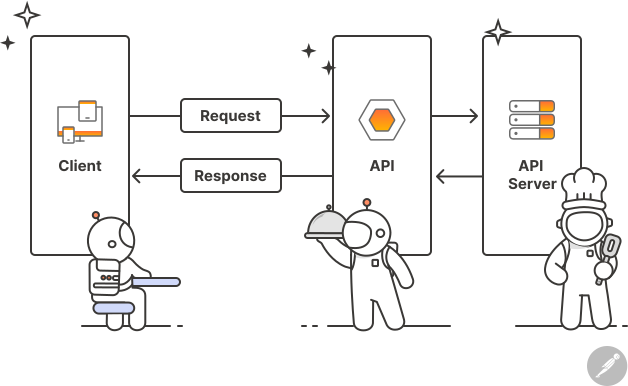



### REST API
Es un tipo de API basada en la arquitectura REST (Representational State Transfer). REST permite la **transferencia de datos via internet**, utilizando el **protocolo HTTP**
Los recursos (funcionalidades, datos, etc) son accesibles a través de endpoints, y las operaciones se realizan sobre esos recursos con métodos HTTP estándar como:
- GET: para obtener datos,
- POST:para enviar datos y crear o insertar un nuevo recurso,
- PUT: para actualizar un recurso existente
- DELETE,
- entre otros.

#### Código de estado
Cuando hacemos una petición a una API y recibimos una respuesta, esa respuesta tendrá un código de estado para identificar el resultado de la petición.
Nos enfocaremos en los siguientes códigos:
- 2xx Petición exitosa
- 4xx Error de **cliente o aplicación**
- 5xx Error del **servidor**



### API de OpenWeather


OpenWeather es una plataforma que proporciona datos meteorológicos en tiempo real, pronósticos del tiempo y otros servicios relacionados con el clima.

Ofrece una API que permite  acceder a información detallada sobre las condiciones climáticas, como temperatura, humedad, velocidad del viento, pronósticos a corto y largo plazo, entre otros.


https://openweathermap.org/api

## 1️⃣ Importación de librerías

Librerias a instalar:

    - !pip install tabulate
    - !pip install pandas requests
    - !pip install  requests


In [21]:
pip install tabulate

In [1]:
# Requests: Se utiliza para realizar solicitudes HTTP a la API, en este caso, la API de OpenWeatherMap.
# Pandas es una biblioteca para la manipulación y análisis de datos en Python.
# La alias 'pd',  comúnmente se utiliza para abreviar el nombre

import requests
import pandas as pd

from tabulate import tabulate

## 2️⃣ Definición de funciónes

La función parametros() genera la URL completa para hacer la solicitud a la API, agregando:

  - La clave de API (api_key).

  - Coordenadas (latitud, longitud).

  - Unidades de medida en °C.

  - Idioma en español.

In [7]:
def parametros(latitud, longitud):
    """
    Genera la URL con los parámetros necesarios para consultar la API de OpenWeatherMap.

    :param latitud: Coordenada de latitud de la ubicación.
    :param longitud: Coordenada de longitud de la ubicación.
    :return: URL completa con los parámetros formateados correctamente.
    """
    return f"{base_url}lat={latitud}&lon={longitud}&appid={api_key}&units=metric&lang=sp"

In [8]:
def obtener_clima(latitud, longitud):
    """
    Obtiene los datos climáticos de una ubicación específica usando la API de OpenWeatherMap.

    :param latitud: Coordenada de latitud de la ubicación.
    :param longitud: Coordenada de longitud de la ubicación.
    :return: Un diccionario con la información del clima (ciudad, clima, temperatura, humedad).
             Retorna None si ocurre un error.
    """
    try:
        # Construcción de la URL con los parámetros adecuados
        params = {
            'lat': latitud,
            'lon': longitud,
            'appid': API_KEY,  # Reemplaza con tu clave de API
            'units': 'metric',  # Para obtener la temperatura en grados Celsius
            'lang': 'es'  # Idioma en español
        }

        # Realiza la solicitud GET a la API
        response = requests.get(WEATHER_URL, params=params)
        data = response.json()

        # Verificar si la respuesta es válida (código de estado 200)
        if data.get('cod') != 200:
            print(f"Error al obtener datos de la API: {data.get('message')}")
            return None

        # Extraer los datos relevantes con .get() para mayor seguridad
        weather_info = {
            'ciudad': data.get('name', 'Desconocida'),
            'clima': data.get('weather', [{}])[0].get('description', 'Sin datos'),
            'temperatura': data.get('main', {}).get('temp', 'No disponible'),
            'humedad': data.get('main', {}).get('humidity', 'No disponible'),
            'presion': data.get('main', {}).get('pressure', 'No disponible'),
            'viento_velocidad': data.get('wind', {}).get('speed', 'No disponible'),
            'viento_direccion': data.get('wind', {}).get('deg', 'No disponible')
        }

        return weather_info

    except requests.exceptions.RequestException as e:
        # Captura errores de conexión, timeout o HTTP y los muestra
        print(f"Error en la solicitud: {e}")
        return None
    except Exception as e:
        # Captura cualquier otro tipo de error
        print(f"Error al procesar los datos del clima: {e}")
        return None

Usa .get() en todas las claves, lo que asegura que no haya errores si alguna clave no existe en el JSON. Además, los valores predeterminados (como "Sin datos", "No disponible", etc.) protegen el código de posibles excepciones.

## 3️⃣  Credenciales de la Api.

Se almacena la clave de API y la URL base de OpenWeatherMap.

In [4]:
# Definimos la clave de API y la URL base
API_KEY = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"  # Guardo la API Key de OpenWeatherMap
WEATHER_URL = "http://api.openweathermap.org/data/2.5/weather?"  # Defino la URL base de la API

print(WEATHER_URL)  # Imprimo la URL base en consola, de modo de ejemplo. Se puede comentar si se cree innecesaria


http://api.openweathermap.org/data/2.5/weather?


** NOTA:**

  ⚠️ Problema: La api_key está expuesta en el código.
  
  Es recomendable almacenarla en una **variable de entorno** o **un archivo de configuración.**

## 4️⃣ Primera solicitud a la API

In [10]:
resp = requests.get(WEATHER_URL)
resp.status_code

401

Se hace una solicitud sin incluir los parámetros requeridos, lo que genera un error.

La API devuelve un código 401 (Unauthorized) porque falta la clave Key de la API.

In [11]:

dir(resp)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

dir(resp): muestra todos los métodos y atributos del objeto resp, que es una respuesta HTTP obtenida con requests.get().

Busco saber si  esta JSON ( Metodo )  y status_code (atributo), antes de obtener los datos:

    - .status_code permite verificar si la solicitud fue exitosa (200).

    - .json() convierte la respuesta a un diccionario de Python, pero si el contenido no es JSON válido, dará un error.

## 5️⃣ Obtener los datos

In [19]:
# latitud y longitud, que representan las coordenadas geográficas del lugar a consultar

datos_clima = obtener_clima("-36.61", "-64.28")
#print(datos_clima)


In [22]:
# Verificar si se obtuvieron los datos del clima

if datos_clima:
    # Crear una lista con los datos para tabular, agregando las unidades correspondientes
    clima_info = [
        ["Ciudad", datos_clima['ciudad']],
        ["Clima", datos_clima['clima']],
        ["Temperatura", f"{datos_clima['temperatura']} °C"],  # Agregar la unidad °C
        ["Humedad", f"{datos_clima['humedad']} %"],  # Agregar la unidad %
        ["Presión", f"{datos_clima['presion']} hPa"],  # Agregar la unidad hPa
        ["Velocidad del viento", f"{datos_clima['viento_velocidad']} m/s"],  # Agregar la unidad m/s
        ["Dirección del viento", f"{datos_clima['viento_direccion']} °"]  # Agregar la unidad °
    ]

    # Imprimir los datos en formato tabla
    print(tabulate(clima_info, headers=["Parámetro", "Valor"], tablefmt="grid"))


+----------------------+------------+
| Parámetro            | Valor      |
+======================+============+
| Ciudad               | Santa Rosa |
+----------------------+------------+
| Clima                | nubes      |
+----------------------+------------+
| Temperatura          | 26.31 °C   |
+----------------------+------------+
| Humedad              | 56 %       |
+----------------------+------------+
| Presión              | 1010 hPa   |
+----------------------+------------+
| Velocidad del viento | 4.46 m/s   |
+----------------------+------------+
| Dirección del viento | 45 °       |
+----------------------+------------+
